<a href="https://colab.research.google.com/github/ajaycode/machine-learning/blob/main/S_%26_P_500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S & P 500 Returns

In [4]:
#Import the python libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from google.colab import auth
import gspread
from google.auth import default
plt.style.use('fivethirtyeight')

In [5]:
auth.authenticate_user()
creds,_ = default()
gc = gspread.authorize (creds)

In [8]:
#from pandas._libs.tslibs.parsing import parse_datetime_string
#workbook = gc.open_by_url('https://docs.google.com/spreadsheets/d/1MhfnKggZxJpKwsMMHoKXcSjvklbpoKyB0lsCWF3GYnw/edit#gid=0')
#worksheet1    = workbook.worksheet('Sheet1')
df1 = pd.read_csv ('SandP_500.csv')
# required, if reading from Google Sheets.
#df1 = pd.DataFrame (worksheet1.get_all_values())

#Treat the first row as columns, needed if reading from a google sheet
#df1.columns = df1.iloc[0]
df1 = df1.iloc[1:]

In [9]:
df1.head()

,Year,Value
1,1872,4.86
2,1873,5.11
3,1874,4.66
4,1875,4.54
5,1876,4.46


In [10]:
#Column names that contain returns
One_Year = '1Y %'
Three_Year = '3Y %'
Five_Year = '5Y %'
Ten_Year  = '10Y %'
Fifteen_Year = '15Y %'
Twenty_Year  = '20Y %'
TwentyFive_Year  = '25Y %'
Thirty_Year  = '30Y %'
Forty_Year   = '40Y %'
Fifty_Year  = '50Y %'

In [11]:
# Convert to integer and floating data typles
#df1['Year']  = pd.to_numeric (df1['Year'], errors = 'coerce')
#df1['Value'] = pd.to_numeric   (df1['Value'],errors='coerce')

In [ ]:
#Check if there are NaN values (non numbers) and display them
#newdf = df1[(df1['Value'].isnull())]
#print (newdf)

In [12]:
# N year returns
#df1.at [0,1,2,3,4, Five_Year] = 0
def returns_in_n_years (number_of_years, column_name_to_be_updated):
  num_years = number_of_years
  for i in range (num_years, len(df1)):
    #df1.at[i+1, column_name_to_be_updated] = 100*(df1.iloc[i]['Value'] - df1.iloc[i-num_years]['Value'])/df1.iloc[i-num_years]['Value']
    df1.at[i+1, column_name_to_be_updated] = 100*(((df1.iloc[i]['Value']/df1.iloc[i-num_years]['Value'])**(1/num_years))-1)
  df1[column_name_to_be_updated] = df1[column_name_to_be_updated].round(2)
  

In [13]:
returns_in_n_years (1, One_Year)
returns_in_n_years (3, Three_Year)
returns_in_n_years(5, Five_Year)
returns_in_n_years (10, Ten_Year)
returns_in_n_years (15, Fifteen_Year)
returns_in_n_years (20, Twenty_Year)
returns_in_n_years (25, TwentyFive_Year)
returns_in_n_years (30, Thirty_Year)
returns_in_n_years (40, Forty_Year)
returns_in_n_years (50, Fifty_Year)

In [14]:
#df1.tail()
#df1[One_Year]  = pd.to_numeric (df1[One_Year], errors = 'coerce')
#df1[Three_Year]  = pd.to_numeric (df1[Three_Year], errors = 'coerce')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 1 to 151
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    151 non-null    int64  
 1   Value   151 non-null    float64
 2   1Y %    150 non-null    float64
 3   3Y %    148 non-null    float64
 4   5Y %    146 non-null    float64
 5   10Y %   141 non-null    float64
 6   15Y %   136 non-null    float64
 7   20Y %   131 non-null    float64
 8   25Y %   126 non-null    float64
 9   30Y %   121 non-null    float64
 10  40Y %   111 non-null    float64
 11  50Y %   101 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 14.3 KB


In [15]:
#df1[Ten_Year].mean()

In [16]:
#Customizing the data table display, sortable columns
from google.colab import data_table
#Replace 'NaN' with blanks
df1 = df1.replace (np.nan, '')
#df1.fillna (" ")
#print (df1)
df1.style.highlight_min (color='blue').highlight_max(color='magenta').highlight_null()
df1.head(len(df1))
#data_table.DataTable(df1, include_index=False, num_rows_per_page=len(df1))

,Year,Value,1Y %,3Y %,5Y %,10Y %,15Y %,20Y %,25Y %,30Y %,40Y %,50Y %
1,1872,4.86,,,,,,,,,,
2,1873,5.11,5.14,,,,,,,,,
3,1874,4.66,-8.81,,,,,,,,,
4,1875,4.54,-2.58,-2.24,,,,,,,,
5,1876,4.46,-1.76,-4.43,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
147,2018,2506.85,-6.24,7.04,6.28,10.75,5.57,3.63,6.96,7.61,8.49,6.57
148,2019,3230.78,28.88,13.0,9.43,11.22,6.76,4.02,8.12,7.66,8.87,7.38
149,2020,3756.07,16.26,12.0,12.94,11.56,7.62,5.37,7.5,8.44,8.65,7.7
150,2021,4766.18,26.89,23.88,16.31,14.25,8.42,7.38,7.73,8.46,9.58,7.99


In [18]:
#@title Calculate average for each period
#df1[One_Year]  = pd.to_numeric (df1[One_Year], errors = 'coerce')

#print (df1[One_Year].mean())
#print (df1[Five_Year].mean())

print( df1[[One_Year, Five_Year, Ten_Year, Fifteen_Year, Twenty_Year, TwentyFive_Year, Thirty_Year, Forty_Year, Fifty_Year]].mean().to_list())

#Round all columns to digits after decimal
averagedf = df1.round(2)
averagedf.head()

[]


<ipython-input-18-6f5592bceb1a>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print( df1[[One_Year, Five_Year, Ten_Year, Fifteen_Year, Twenty_Year, TwentyFive_Year, Thirty_Year, Forty_Year, Fifty_Year]].mean().to_list())


,Year,Value,1Y %,3Y %,5Y %,10Y %,15Y %,20Y %,25Y %,30Y %,40Y %,50Y %
1,1872,4.86,,,,,,,,,,
2,1873,5.11,5.14,,,,,,,,,
3,1874,4.66,-8.81,,,,,,,,,
4,1875,4.54,-2.58,-2.24,,,,,,,,
5,1876,4.46,-1.76,-4.43,,,,,,,,


In [19]:
#@title Calculate the mean using DataFrame.mean()
averagedf = df1.mean (axis = 0, skipna = True)
#data_table.DataTable(averagedf, include_index=False)

<ipython-input-19-3fc32e3ad5d4>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  averagedf = df1.mean (axis = 0, skipna = True)


In [23]:
averagedf[One_Year].round(2)

KeyError: ignored

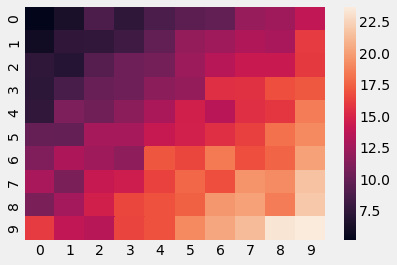

In [22]:
#@title To Do: Add a heatmap of returns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Make a 10 x 10 heatmap of some random data
side_length = 10
# Start with a 10 x 10 matrix with values randomized around 5
data = 5 + np.random.randn(side_length, side_length)
# The next two lines make the values larger as we get closer to (9, 9)
data += np.arange(side_length)
data += np.reshape(np.arange(side_length), (side_length, 1))
# Generate the heatmap
sns.heatmap(data)
plt.show()